### Table of contents

## 10 <a id="top" name="top" >Random Forest</a><br>
>10.1 <a href="#intro">Introduction to random forest</a><br>
>> 10.1.1<a href="#intuition"> Random Forest intuition</a><br>
>> 10.1.2<a href="#ad"> Advantages and Disadvantages of Random forest</a><br>
>> 10.1.3<a href="#feature-selection"> Feature selection with Random forest</a><br>

>10.2 <a href="#dataset">The dataset</a><br>
>>10.2.1 <a href="#import">Importing librarires and loading dataset</a><br>
>>10.2.2 <a href="#eda">Exploratory data analysis</a><br>
>>10.2.3 <a href="#split">Splitting the data</a><br>
>>10.2.4 <a href="#feature-eng">Feature engineering</a><br>

>10.3 <a href="#train">Traning model</a><br>
>>10.3.1 <a href="#RFC-default">Random Forest Classifier with default parameters</a><br>
>>10.3.2 <a href="#RFC-model">Random forest classifier with model parameters</a><br>
>>10.3.3 <a href="#RFM">Finding important features with Random forest model</a><br>

>10.4 <a href="#model-performance">Model Performance</a><br>
>>>10.4.1 <a href="#feature-scores">Visualizing feature scores</a><br>
>>>10.4.2 <a href="#built">Building Random forest model on selected features</a><br>
>>>10.4.3 <a href="#cm-cr">Confusion Matrix and classification report</a><br>

## <a id="intro" name="intro">10.1 Introduction to Random forest</a>

<a href="#top">⇑ Table of Contents</a>

So far we have learned Linear regression, logistic regression, Stochastic Gradient Descent classifier, Support Vector machines, and decision trees in supervised learning algorithms. Moreover, we have solved classification kind of problems with these algorithms.

In this chapter, we use another algorithm to solve the classification problem. This is called a "**Random Forest**". We use the same dataset that is used for the decision tree called "car_evalution".Let's learn how these random forests work.

- **Random Forests** are other supervised algorithms that are used for both regression and classification tasks.
- It is the most flexible and easy to use.
- It creates multiple decision trees and each tree will predict the results. And among these decision trees, it will find the best solution.
- It creates a forest by creating multiple decision trees which is why it is called a random forest.

We use random forests during the following situations:
- **Large datasets**: Random features can handle a large number of datasets.
- **Non-linear relationship**: If there is a non-linear relationship between features and target variables random forest is used.
- **Missing values**: It can handle data sets with missing values.
- **Feature selection**:  Random forest can be used for feature selection by calculating feature importance, which helps in identifying the most important predictors.
- **Multiclass classification**: If the problem involves putting multiple values for the target variables then a random forest is used.

### <a id="intuition" name="intuition">10.1.1 Random forest Intuition</a>

<a href="#top">⇑ Table of contents</a>

Random forest intuition can be put down in two steps;
1. Creating a random forest
2. Making predictions

- **Creating a random forest**
> 1. Selects n feature out of m features where n<m.
> 2. Calculating the value for some node d using some best split points.
> 3. Splitting the node into daughter nodes using split points.
> 4. Repeating steps 1-3 till it reaches a tree with k distinct nodes.
> 5. Building forest by repeating steps 1-4.

- **Making predictions**
> 1. Making predictions using test features for every decision tree in the random forest.
> 2. Using a voting strategy we'll calculate the votes for the predicted values.
> 3. Then we'll choose the high-voted predicted values as the prediction for the feature.

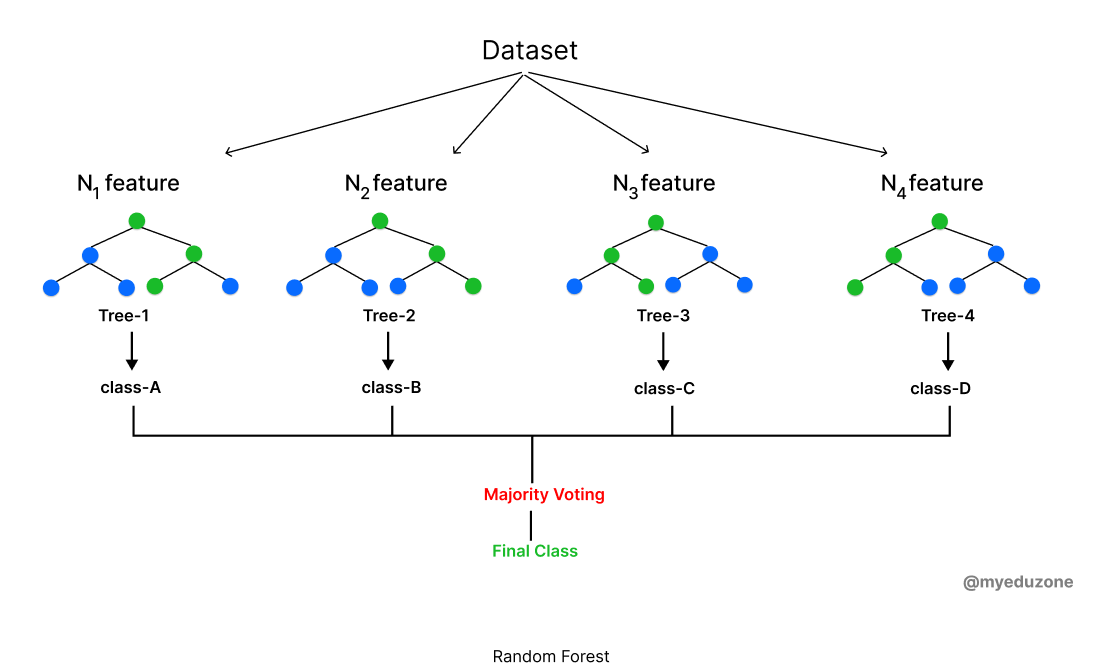

### <a id="ad" name="ad">10.1.2 Advantages and disadvantages of Random forest</a>

<a href="#top">⇑ Table of contents</a>

Look at the table for advantages and disadvantages;

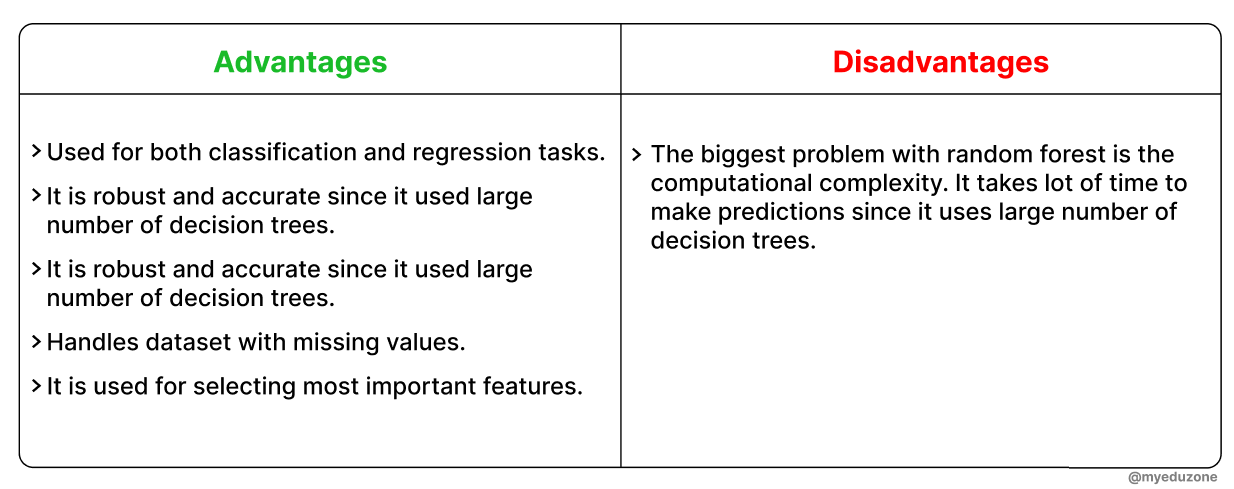

### <a id="feature-selection" name="feature-selection">10.1.3 Feature selection with random forest</a>

<a href="#top">⇑ table of contents</a>

The feature selection procedure can make use of the random forests algorithm. The significance of variables in a regression or classification problem can be ranked using this algorithm.

By fitting the random forest algorithm to the data, we can determine the importance of each variable in a dataset. The out-of-bag error for every data point is noted during the fitting process and averaged across the forest.

Following training, the j-th feature's significance was assessed. The j-th feature values were permuted across the training set, and this perturbed dataset was used to compute the out-of-bag error once more. The difference in out-of-bag error before and after the permutation over all trees is averaged to determine the importance score for the j-th feature. The standard deviation of these differences is used to normalize the score.

Larger values are produced by features for this score, and these features are prioritized over smaller values. We will select the most crucial features and omit the least crucial ones for model building based on this score.


## <a id="dataset" name="dataset">10.2 The dataset</a>

<a href="#top">⇑ Table of Contents</a>

We are going to use the same dataset that we have used in the previous chapter, that is "car_evaluation" dataset. Load the dataset into the environment before running the .ipynb files.

### <a id="import" name="import">10.2.1 Importing libraries and loading dataset</a>

<a href="#top">⇑ Table of contents</a>

In [38]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [39]:
#loading dataset

data = pd.read_csv('car_evaluation.csv')

We have imported the necessary libraries and loaded the dataset. Let's explore the dataset once again.

### <a id="eda" name="eda">10.2.2 Exploratory Data Analysis</a>

<a href="#top">⇑ Table of Contents</a>

In [40]:
data.shape

(1727, 7)

The dataset contains 1,727 rows and 7 columns/attributes.

In [41]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Let's rename the columns

In [42]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = column_names
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

We have changed the column names of the dataset. Let's see the summary of the dataset.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


There are no missing values in the dataset. Every attribute is a string type and "class" attribute is our target variable. Let's see the frequency of values in each attribute.

In [44]:
for column in column_names:
  print(data[column].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Let's see "class" variables and what is holds.

In [45]:
data["class"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

Okay. We have got some insights from the dataset. As the dataset was previously used in the last chapter there are not many queries in our mind.

Let's prepare the data for training and testing.

### <a id="split" name="split">10.2.3 Splitting the data</a>

<a href="#top">⇑ Table of contents</a>

In [46]:
# separating target and feature variables
X = data.drop('class',axis=1)
y= data['class']

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape,X_test.shape

((1157, 6), (570, 6))

We have separated the features and the target variables, and then we have created a train and test set with sizes (1,157,6) and (570,6). We used **`train_test_split`** to split the dataset.

The next thing we need to do is feature engineering. As we are dealing with a classification task and also every feature is a categorical type we need to encode the data. So we use the same procedure that we have done in the previous chapter.

### <a id="feature-eng" name="feature-eng">10.2.4 Feature engineering</a>

<a href="#top">⇑ Table of Contents</a>

We have already discussed the importance of feature engineering in the previous chapter. So we are not gonna discuss it again. Let's get to the coding part.

In [48]:
! pip install category_encoders

In [49]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

We have used **`category_encoders`** to encode the categorical data. Then using the **`fit_transform()`** method we finally transformed the data.

In [50]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


Throughout this section, we have completed importing libraries and loading datasets. Then we explored the data and checked for missing values. Encoded the categorical data using **`category_encoders`**.

It's time to create the random forest model.

## <a id="train" name="train">10.3 Training model</a>

<a href="#top">⇑ Table of contents</a>

In this section, we'll see how to create and train our random forest with default parameters and by giving some parameters.

### <a id="RFC-default" name="RFC-default">10.3.1 Random forest classifier with default parameters</a>

<a href="#top">⇑ Table of contents</a>

Let's create a model with default parameters. Check the below code to create a model with default parameters.

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

We have created a random forest model using default parameters. **`sklearn.ensemble`** has **`RandomForestClassifier`** that enables us to create a model to fit the training data.

Let's predict the results of the test data.

In [52]:
y_test_pred = rfc.predict(X_test)

Now let's check the accuracy score for this test set predictions.

In [53]:
from sklearn.metrics import accuracy_score

print(f' Accuracy score of the model on the test set is: {accuracy_score(y_test,y_test_pred)}')

 Accuracy score of the model on the test set is: 0.9649122807017544


We have just built a random forest model using only 10 decision trees saying **`n_estimators=10`** that we didn't provide but it is the default. The accuracy of the model over the test set falls at 0.96 which needs to be improved.

Let's create another model with decision trees 100.

### <a id="RFC-model" name="RFC-model">10.3.2 Random Forest with model parameters</a>

<a href="#top">⇑ Table of contents</a>

In [54]:
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

We have created another model by passing **`n_estimators=100`** telling it to create 100 decision trees.

In [55]:
y_test_pred_100 = rfc_100.predict(X_test)

In [56]:
print(f'accuracy of the model with 100 trees is :{accuracy_score(y_test,y_test_pred_100)}')

accuracy of the model with 100 trees is :0.9649122807017544


The accuracy of the model is the same as for default parameters. Due to the dataset we have the accuracy of the model has been only 96.

Now let's see which feature is given more importance.

### <a id="RFM" name="RFM">10.3.3 Finding important features with Random forest model</a>

<a href="#top">⇑ Table of contents</a>

To see which feature is given more importance let's create the model again.

In [57]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

Now let's use **`pandas.Serires`** to display the results.

In [58]:
feature_scores = pd.Series(rfc.feature_importances_,index = X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

What we have done is, after creating the instance for the **`RandomForestClassifier`** class with 100 decision trees, we sorted the **`feature_importances_`** and displayed only columns using **`X_train.columns`** and sorted them in descending order using **`sort_values()`** method.

The attributes "safety" and "persons" are given more importance by the model. Let's see visually how to plot these results in the form of a bar graph. Check the below code to create a bar graph.

## <a id="model-performance" name="model-performance">10.4 Model Performance</a>

<a href="#top">⇑ Table of contents</a>

###  <a id="feature-scores" name="feature-scores">10.4.1 Visualizing feature scores</a><br>

<a href='#top'>⇑ Table of contents</a>

Let's see in this section the feature importance score that we found in the last section visually.

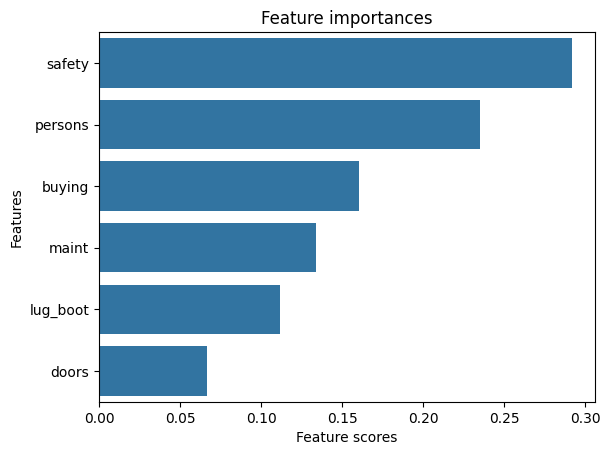

In [59]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature scores')
plt.ylabel('Features')
plt.title('Feature importances')
plt.show()

You can see that the attributes "safety" and "persons" have the highest scores among other features. And "doors" have the lowest score.

Okay. Let's build a last model that has training data and test data but this time removing the "doors" attribute too. Let's see this process.

### <a id="built" name="built">10.4.2 Building Random forest model on selected features</a>

<a href="#top">⇑ Table of Contents</a>

Now we'll again separate the data into features and target variables and then split the data into training and test sets. Later encode the data and finally, we'll create and train the model.

In [60]:
# separation of features and target variables
X = data.drop(['class','doors'],axis=1)
y = data['class']

#splitting into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#encoding the categorical variables
column_names = ['buying', 'maint',  'persons', 'lug_boot', 'safety']
encoder= ce.OrdinalEncoder(cols=column_names)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

#creating the model with n_estimators=100
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

Initially, we separated the features from the target variables and then split the data into train and test sets. Later we performed encoding using **`category_encoder`** to transform the categorical variables. Finally, we have created a model of **`n_esitmators=100`** and trained it.

Let's see the results.

In [61]:
y_pred = clf.predict(X_test)
print(f"Model accuracy: {accuracy_score(y_test,y_pred)}")

Model accuracy: 0.9263157894736842


Great! So far the random forest model is doing very well with training data. But we can't blindly trust the accuracy score always. So let's check with the confusion matrix and the classification report.

### <a id="cm-cr"  name="cm-cr">10.4.3 Confusion matrix and classification report</a>

<a href="#top">⇑ Table of Contents</a>

confusion matrix
 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


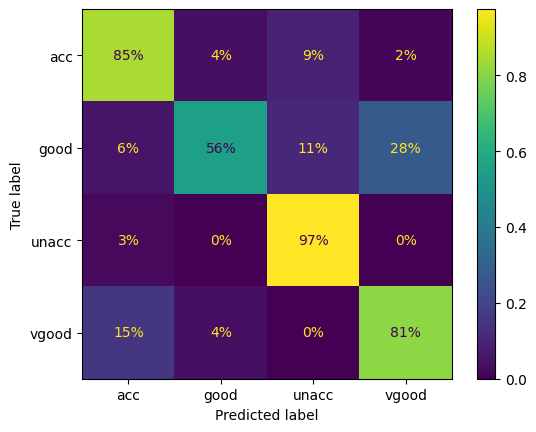

In [63]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
print('confusion matrix\n',cm )

ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize='true',values_format='0.0%')

Using the confusion matrix you can find out the errors that could made by the model. The last model that we have created has generally made a few errors saying that 15% of **`vgood`** labels are classified falsely as **`acc`** and so on. You can see the confusion matrix that is plotted visually using **`ConfusionMatrixDisplay.from_predictions()`**.

At last, we'll now check the precision, recall, f1 score, and support of our final model.

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



So, overall the precision, recall, and f1-score of the model is above 90. Finally, our random forest model has made a good job over our data set compared to the decision trees that we have done in the last chapter.

## Summary

Finally, we have learned one more supervised learning algorithm called "random forests". This unit have taught;

- What are random forests and the differences between random forests and decision trees?

- Then we came to know when and where to use the random forest.

- Used the 'car_evaluation' dataset which is a classification kind of problem.

- Built two models with default parameters (**`n_estimators=10`**) and with some parameters (**`n_esitmators=100`**).

- Checked the feature's importance and eliminated the less important features.

- Created a final model and computed its accuracy, confusion matrix, precision, recall, f1 score, and support

Throughout this entire, the only thing we have focused on is how to write code to create a random forest model.